In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from collections import defaultdict
from sklearn import linear_model

In [33]:
dataset = pd.read_csv("stats.csv")

In [65]:
dataset.columns

Index(['last_name, first_name', 'player_id', 'year', 'pa', 'k_percent',
       'bb_percent', 'p_era', 'woba', 'xwoba', 'in_zone_percent',
       'whiff_percent', 'swing_percent', 'pitch_hand', 'n', 'arm_angle',
       'n_fastball_formatted', 'fastball_avg_speed', 'fastball_avg_spin',
       'fastball_avg_break', 'n_breaking_formatted', 'breaking_avg_spin',
       'breaking_avg_break', 'n_offspeed_formatted', 'offspeed_avg_spin',
       'offspeed_avg_break'],
      dtype='object')

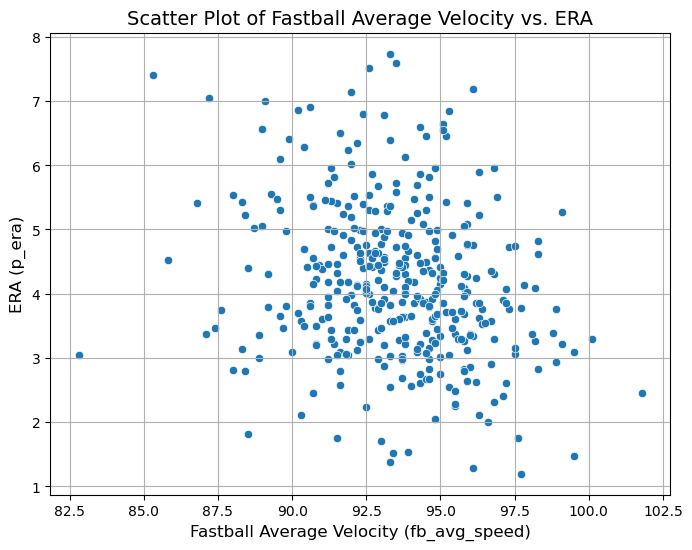

In [34]:
fastball_data = dataset[['fastball_avg_speed', 'p_era']].dropna()  # Replace 'fb_avg_speed' with the actual column name

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fastball_data, x='fastball_avg_speed', y='p_era')

# Add labels and title
plt.xlabel('Fastball Average Velocity (fb_avg_speed)', fontsize=12)
plt.ylabel('ERA (p_era)', fontsize=12)
plt.title('Scatter Plot of Fastball Average Velocity vs. ERA', fontsize=14)
plt.grid(True)
plt.show()

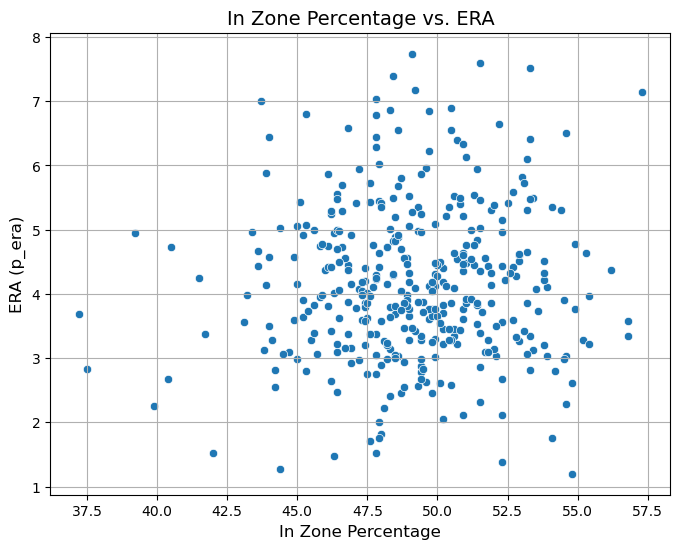

In [77]:
inzone_percentage = dataset[['in_zone_percent', 'p_era']].dropna()  # Replace 'fb_avg_speed' with the actual column name

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=inzone_percentage, x='in_zone_percent', y='p_era')

# Add labels and title
plt.xlabel('In Zone Percentage', fontsize=12)
plt.ylabel('ERA (p_era)', fontsize=12)
plt.title('In Zone Percentage vs. ERA', fontsize=14)
plt.grid(True)
plt.show()

In [36]:
era = dataset['p_era']

In [45]:
def feature(d):
    feat = [1]
    feat.append(d['fastball_avg_speed'])
    return feat

In [56]:
X = np.array([feature(row) for _, row in dataset.iterrows()])

In [57]:
X

array([[  1. ,  85.3],
       [  1. ,  89. ],
       [  1. ,  94.3],
       [  1. ,  87.2],
       [  1. ,  86.8],
       [  1. ,  93.8],
       [  1. ,  94.8],
       [  1. ,  92.8],
       [  1. ,  92. ],
       [  1. ,  91.2],
       [  1. ,  92.4],
       [  1. ,  97.2],
       [  1. ,  90.7],
       [  1. ,  88.3],
       [  1. ,  93.6],
       [  1. ,  91.4],
       [  1. ,  90.3],
       [  1. ,  91.3],
       [  1. ,  93.3],
       [  1. ,  94.5],
       [  1. ,  91.5],
       [  1. ,  93.8],
       [  1. ,  92.8],
       [  1. ,  95. ],
       [  1. ,  91.7],
       [  1. ,  95. ],
       [  1. ,  91.8],
       [  1. ,  95.8],
       [  1. ,  94. ],
       [  1. ,  94.7],
       [  1. ,  93.8],
       [  1. ,  92.4],
       [  1. ,  90.9],
       [  1. ,  88.5],
       [  1. ,  89.9],
       [  1. ,  94.5],
       [  1. ,  88.3],
       [  1. ,  93.3],
       [  1. ,  96.2],
       [  1. ,  88. ],
       [  1. ,  93.1],
       [  1. ,  93.7],
       [  1. ,  91.6],
       [  1

In [59]:
y = np.array(era)
y

array([7.4 , 5.06, 3.22, 7.04, 5.41, 3.64, 4.56, 3.77, 6.02, 5.73, 6.8 ,
       4.07, 2.46, 3.14, 3.28, 3.21, 3.57, 4.73, 3.03, 3.87, 5.42, 4.56,
       4.66, 3.02, 4.91, 3.34, 3.29, 3.26, 2.56, 3.58, 4.3 , 4.4 , 4.45,
       4.4 , 6.41, 5.31, 5.43, 1.38, 2.63, 2.81, 4.88, 3.63, 2.79, 5.53,
       3.74, 6.28, 3.28, 4.73, 4.3 , 4.28, 4.18, 3.46, 3.09, 2.8 , 5.36,
       4.09, 3.61, 6.45, 5.45, 5.2 , 4.2 , 4.76, 4.15, 3.6 , 6.1 , 3.86,
       4.78, 1.82, 4.5 , 3.98, 4.02, 3.83, 3.95, 3.86, 2.98, 3.16, 4.12,
       5.  , 4.09, 6.5 , 4.84, 4.38, 5.55, 4.56, 1.71, 3.3 , 2.83, 3.03,
       5.22, 5.38, 4.45, 3.87, 3.1 , 6.4 , 5.5 , 2.68, 5.22, 4.04, 4.37,
       3.6 , 4.73, 3.77, 7.  , 4.42, 2.86, 4.12, 5.95, 3.05, 4.46, 2.9 ,
       2.25, 2.28, 4.42, 5.08, 2.55, 4.55, 6.85, 3.62, 3.53, 3.43, 6.79,
       5.03, 3.57, 3.35, 3.9 , 2.55, 4.88, 4.42, 3.1 , 3.22, 3.12, 4.67,
       3.92, 3.38, 4.31, 5.89, 5.24, 3.99, 3.91, 6.34, 3.5 , 4.43, 3.65,
       3.76, 2.23, 3.29, 4.43, 5.54, 3.86, 4.33, 5.

In [60]:
# Baseline model just using linear regression with fastball velocity
baseline_model = sklearn.linear_model.LinearRegression()
baseline_model.fit(X, y)

LinearRegression()

In [62]:
y_pred = baseline_model.predict(X)

In [63]:
sse = sum([x**2 for x in (y - y_pred)])

In [64]:
mse = sse / len(y)
mse

1.357528982703993

In [66]:
def feature2(d):
    feat = [1]
    feat.append(d['fastball_avg_speed'])
    feat.append(d['fastball_avg_spin'])
    feat.append(d['in_zone_percent'])
    return feat

In [69]:
X = np.array([feature2(row) for _, row in dataset.iterrows()])
X

array([[1.000e+00, 8.530e+01, 2.221e+03, 4.840e+01],
       [1.000e+00, 8.900e+01, 2.262e+03, 4.900e+01],
       [1.000e+00, 9.430e+01, 2.428e+03, 5.070e+01],
       ...,
       [1.000e+00, 8.980e+01, 2.010e+03, 4.610e+01],
       [1.000e+00, 9.350e+01, 2.441e+03, 5.310e+01],
       [1.000e+00, 9.140e+01, 2.123e+03, 4.870e+01]])

In [70]:
model2 = sklearn.linear_model.LinearRegression()
model2.fit(X, y)

LinearRegression()

In [71]:
y_pred_2 = model2.predict(X)

In [74]:
sse = sum([x**2 for x in (y - y_pred_2)])

In [75]:
mse = sse / len(y)
mse

1.3237528721754352